## Visualizing Time Series Data

The first thing we should do is import the libraries that we will need along with our data. Then we shrink the data frame into the two categories we need which we will name date and sales. After we set the index to the date column we are ready to visualize our time series data.

In [7]:
# import libraries and data
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt   
import seaborn as sns  
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime

In [8]:
# first data set
df1 = pd.read_csv("C:/Users/ryans/Documents/Predictive Modeling/Time-Series/online_retail_I1.csv", parse_dates = ['InvoiceDate'])
# second data set
df2 = pd.read_csv("C:/Users/ryans/Documents/Predictive Modeling/Time-Series/online_retail_I2.csv", parse_dates = ['InvoiceDate'])

In [9]:
# create one data frame
df = [df1, df2]
df = pd.concat(df)

In [10]:
# check that InvoiceDate is datetime type
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [11]:
# create separate data frame of date and sales
data = df[['InvoiceDate', 'Quantity']]
data.columns = ['date', 'sales']
data.head()

date  sales
0 2009-12-01 07:45:00     12
1 2009-12-01 07:45:00     12
2 2009-12-01 07:45:00     12
3 2009-12-01 07:45:00     48
4 2009-12-01 07:45:00     24

To get some insights on our data we will plot it using the plot() function. First we will change the index to the date column so that we are getting a line graph of our sales by date.

In [12]:
# set index
data = data.set_index('date')
data

sales
date                      
2009-12-01 07:45:00     12
2009-12-01 07:45:00     12
2009-12-01 07:45:00     12
2009-12-01 07:45:00     48
2009-12-01 07:45:00     24
...                    ...
2011-12-09 12:50:00      6
2011-12-09 12:50:00      4
2011-12-09 12:50:00      4
2011-12-09 12:50:00      3
2011-12-09 12:50:00      1

[1067371 rows x 1 columns]

<Axes: xlabel='date'>

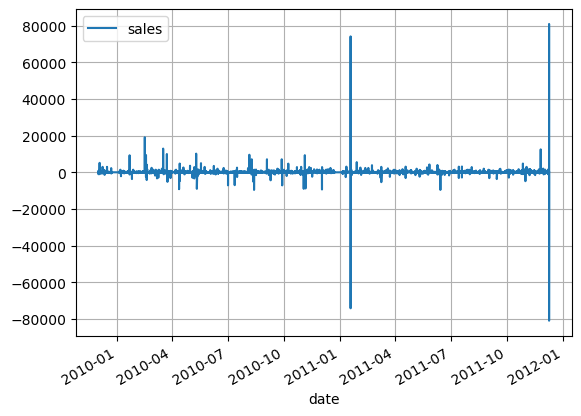

In [13]:
# plot the data
data.plot(grid = True)

We can also create a function that makes a basic line chart and pass in the data that we want to be graphed. This will help us write less code for times when we want to graph other charts such as a line chart for monthly or weekly data. Our function will take 4 parameters. These will be the data we want to be graphed, the x axis, y axis, and title of any new graph we want. Since we set the date column to be the index we will need to create a column to hold this data again since we are using a column as our x-axis.

In [14]:
data['date'] = data.index

In [15]:
data = data[['date', 'sales']]
data.head()

date  sales
date                                          
2009-12-01 07:45:00 2009-12-01 07:45:00     12
2009-12-01 07:45:00 2009-12-01 07:45:00     12
2009-12-01 07:45:00 2009-12-01 07:45:00     12
2009-12-01 07:45:00 2009-12-01 07:45:00     48
2009-12-01 07:45:00 2009-12-01 07:45:00     24

In [16]:
# create a method to pass a plot to. This is to create a standard plot
def plot_retail(retail, x, y, title="", xlabel='Date', ylabel='Sales', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

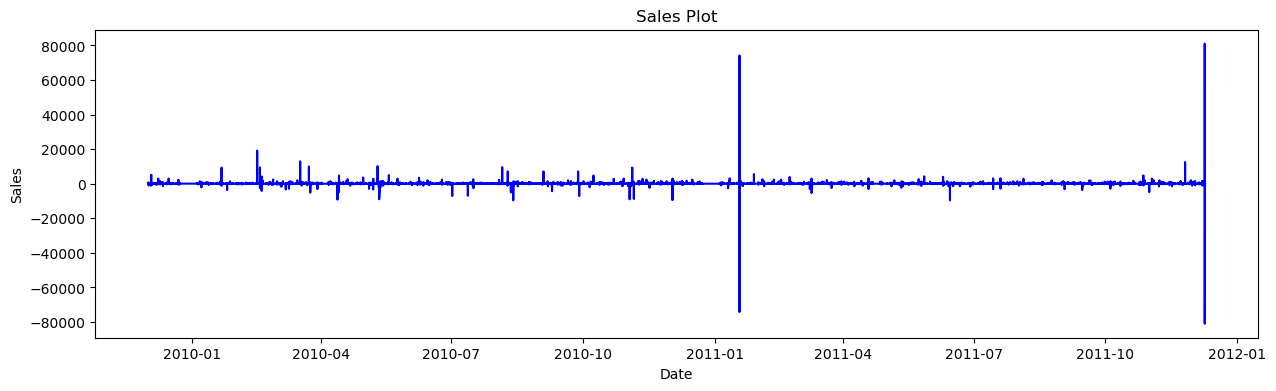

In [17]:
# pass in the parameters for our graph
plot_retail(data, x = data['date'], y = data['sales'], title = 'Sales Plot')

Now that we see our data plotted we notice that there are too many records to gain a lot of insight on. We can zoom in on a period of time such as two months. We will do this in two different ways. The first way will be to choose an index of the data we want graphed and the other will be to create a slider for our graph that we can use to zoom in on the data we want to see. By having to graph this data again we see that creating a function for a basic graph and passing in new parameters is saving time and reducing the chance of making an error. 

In [18]:
# graph the data over a specific time period.
# create a variable for two month sales
two_month = data.loc['2010-07-01':'2010-09-01']

C:\Users\ryans\AppData\Local\Temp\ipykernel_28068\2359113345.py:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  two_month = data.loc['2010-07-01':'2010-09-01']


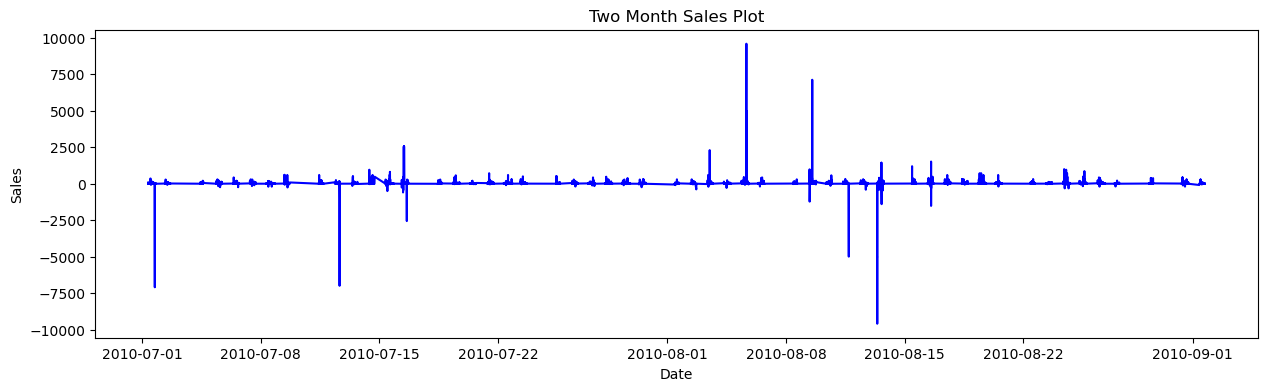

In [19]:
# pass new variable in to our graph
plot_retail(two_month, x = two_month['date'], y = two_month['sales'], title = 'Two Month Sales Plot')

Creating a slider is a great way to view our graph in many different ways. We can use the slider on the bottom to zoom in on a portion of the data or we can click and drag a time frame to zoom in on it. The difference between this step and the first step is that we are focusing in on a certain time frame. This allows us to see trends and/or seasonality when focusing on a smaller portion of the data. By doing this, it seems that sales are higher mid-week than they are during the weekends. It also appears that Saturday's are mostly 0 which may indicate they are closed on that day. This type of insight is not available to us when viewing the million+ records all at once.

In [20]:
# change dates to be grouped by days, not exact time of purchase
day = data.set_index('date').resample('D').sum()
# since we set index to date column we lost that column. Add it back to df
day['date'] = day.index
day.head()

sales       date
date                        
2009-12-01  24022 2009-12-01
2009-12-02  29942 2009-12-02
2009-12-03  44896 2009-12-03
2009-12-04  21001 2009-12-04
2009-12-05   5033 2009-12-05

In [21]:
# we can also resample by month and graph it to look for trends and seasonality
monthly_sales = data.set_index('date').resample('M').sum()
monthly_sales['date'] = monthly_sales.index
monthly_sales

sales       date
date                         
2009-12-31  420088 2009-12-31
2010-01-31  375363 2010-01-31
2010-02-28  368402 2010-02-28
2010-03-31  489370 2010-03-31
2010-04-30  351971 2010-04-30
2010-05-31  364095 2010-05-31
2010-06-30  388253 2010-06-30
2010-07-31  302201 2010-07-31
2010-08-31  451803 2010-08-31
2010-09-30  478262 2010-09-30
2010-10-31  601729 2010-10-31
2010-11-30  673856 2010-11-30
2010-12-31  508876 2010-12-31
2011-01-31  308966 2011-01-31
2011-02-28  277989 2011-02-28
2011-03-31  351872 2011-03-31
2011-04-30  289098 2011-04-30
2011-05-31  380391 2011-05-31
2011-06-30  341623 2011-06-30
2011-07-31  391116 2011-07-31
2011-08-31  406199 2011-08-31
2011-09-30  549817 2011-09-30
2011-10-31  570532 2011-10-31
2011-11-30  740286 2011-11-30
2011-12-31  226334 2011-12-31

Now that the data is resampled by monthly sales we can create a bar chart to see what months have higher sales. It does not appear that there is any seasonality at the monthly level because there is no upward and downward trends.

<Axes: xlabel='date'>

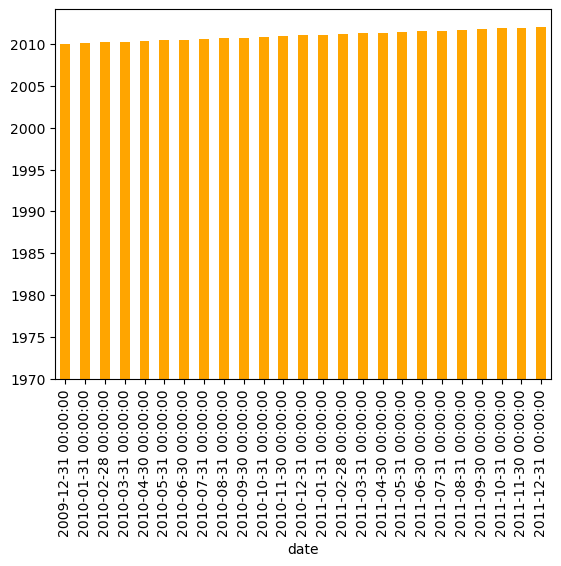

In [22]:
# bar chart of montly sales to look for seasonality
# upward trend but no seasonality
monthly_sales["date"].plot(kind="bar", color="orange", legend=False)

In [23]:
# plot the monthly sales with a slider
import plotly.express as px
fig = px.line(monthly_sales, x = 'date', y = 'sales', title= 'Monthly Sales with Slider')
fig.update_xaxes(rangeslider_visible = True)
fig.show()

### Weekly Seasonality

When we resample the data by day and plot the data again we see there is some seasonality in the data. This data has many peaks and valleys which indicate that certain days in the week are correlated with higher sales volume. Seeing a similar pattern throughout the weekdays is what tells us that seasonality at the weekly level exists. We can see this by moving our slider or dragging the mouse over a certain range in the graph below, or creating a new graph from a variable that is made up of only certain rows of our data and then graphing that variable with our plot function. 

In [24]:
# plot the daily sales with a slider
import plotly.express as px
fig = px.line(day, x = 'date', y = 'sales', title= 'Number of Sales with Slider')
fig.update_xaxes(rangeslider_visible = True)
fig.show()

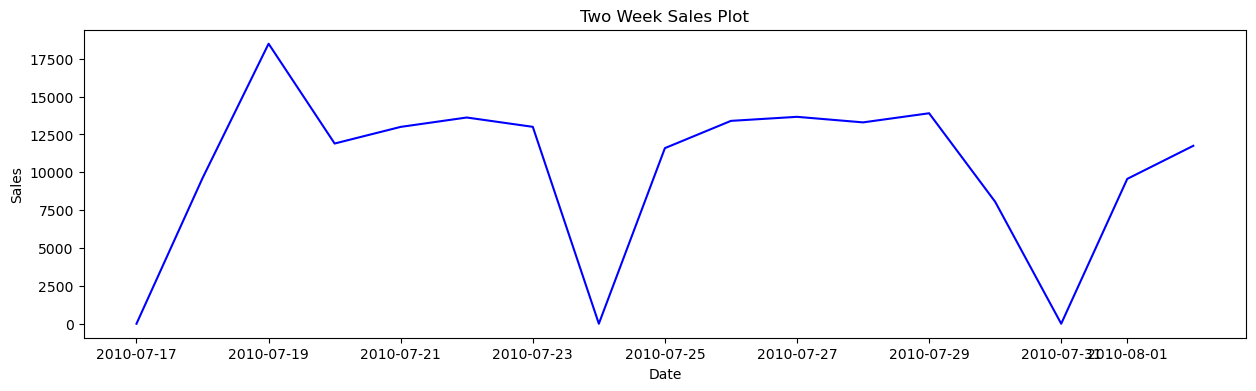

In [25]:
# one month graph of daily sales
# create a variable for two month sales
two_week = day.loc['2010-07-17':'2010-08-02']
plot_retail(two_week, x = two_week['date'], y = two_week['sales'], title = 'Two Week Sales Plot')

TypeError: unsupported operand type(s) for *: 'Timestamp' and 'float'

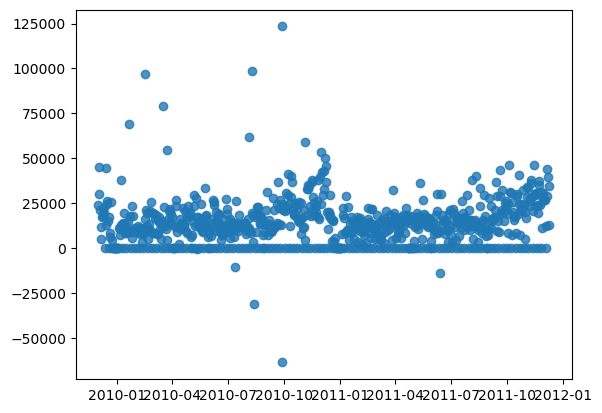

In [22]:
# add linear trend line
sns.regplot(x=day['date'], y=day['sales'], data=day, order=1)

To further illustrate our last assumption of seasonality at the weekly interval we can add columns for the day month and year and then add a column for the name of the weekday.

In [26]:
# make columns for day and month
data['Year'] = pd.DatetimeIndex(data['date']).year
data['Month'] = pd.DatetimeIndex(data['date']).month
data['Day'] = pd.DatetimeIndex(data['date']).day

C:\Users\ryans\AppData\Local\Temp\ipykernel_28068\1986778904.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ryans\AppData\Local\Temp\ipykernel_28068\1986778904.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ryans\AppData\Local\Temp\ipykernel_28068\1986778904.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [27]:
data.head()

date  sales  Year  Month  Day
date                                                            
2009-12-01 07:45:00 2009-12-01 07:45:00     12  2009     12    1
2009-12-01 07:45:00 2009-12-01 07:45:00     12  2009     12    1
2009-12-01 07:45:00 2009-12-01 07:45:00     12  2009     12    1
2009-12-01 07:45:00 2009-12-01 07:45:00     48  2009     12    1
2009-12-01 07:45:00 2009-12-01 07:45:00     24  2009     12    1

In [28]:
#add weekday name for readability
data['Day'] = data['date'].dt.day_name()
data.head()

C:\Users\ryans\AppData\Local\Temp\ipykernel_28068\3286264222.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



date  sales  Year  Month      Day
date                                                                
2009-12-01 07:45:00 2009-12-01 07:45:00     12  2009     12  Tuesday
2009-12-01 07:45:00 2009-12-01 07:45:00     12  2009     12  Tuesday
2009-12-01 07:45:00 2009-12-01 07:45:00     12  2009     12  Tuesday
2009-12-01 07:45:00 2009-12-01 07:45:00     48  2009     12  Tuesday
2009-12-01 07:45:00 2009-12-01 07:45:00     24  2009     12  Tuesday

Grouping by day name shows us that Saturday and Sunday have less sales than other days in the week. This can be a case of weekly seasonality. For our data it appears that each week will have less sales from Friday through Sunday and pick back up on Mondays.

In [29]:
# combine sales for each day
total_daily = data['2009':'2011'][['Day', 'sales']].groupby('Day').sum()
total_daily

C:\Users\ryans\AppData\Local\Temp\ipykernel_28068\1118487057.py:2: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



sales
Day               
Friday     1511812
Monday     1936004
Saturday      5033
Sunday     1042998
Thursday   2307505
Tuesday    1859062
Wednesday  1946078

<Axes: xlabel='Day'>

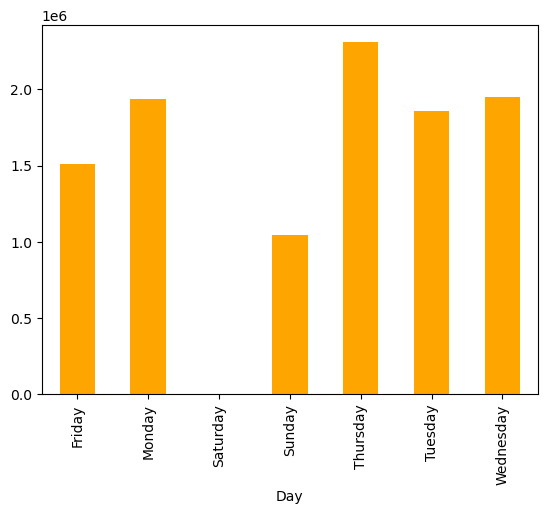

In [27]:
total_daily["sales"].plot(kind="bar", color="orange", legend=False)

### Supress Seasonality by Yearly Sales

In [30]:
# aggregate by yearly mean
# view sales of each quarter of our data frame
yearly_sales = (day.groupby([day['date'].dt.year]).agg(sales = ('sales' , 'mean')))
# rename the index
yearly_sales.index.name = 'year'
# add date column back
yearly_sales['date'] = yearly_sales.index
yearly_sales

sales  date
year                    
2009  13551.225806  2009
2010  14668.989041  2010
2011  14093.944606  2011

When we aggregate our data on the yearly level we see that seasonality is not a problem anymore. The average yearly sales plot gives us a graph that shows 2010 had the highest sales followed by 2011 then 2009. 

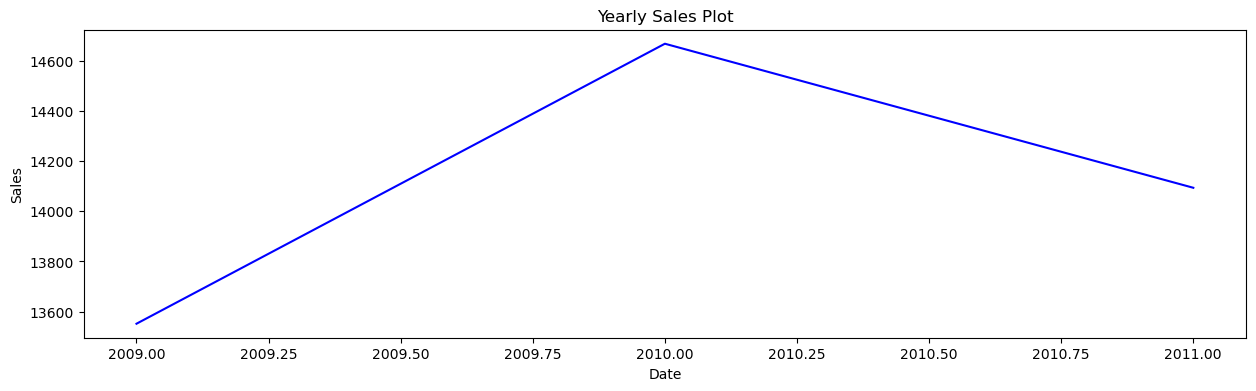

In [31]:
plot_retail(yearly_sales, x = yearly_sales['date'], y = yearly_sales['sales'], title = 'Yearly Sales Plot')

### Lag Scatter Plots

Lag scatter plots can be used to show the autocorrelation in our data. Something like the average hourly temperature will show strong correlation because the temperature does not drastically jump within an hour, but something like sales in our case shows that the relationship between the time and the sale is not very strong. Below are the lag plots in our daily sales with lag times of 1, 7, 14, 30, 180, and 365. The correlation does not prove to be strong. 

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

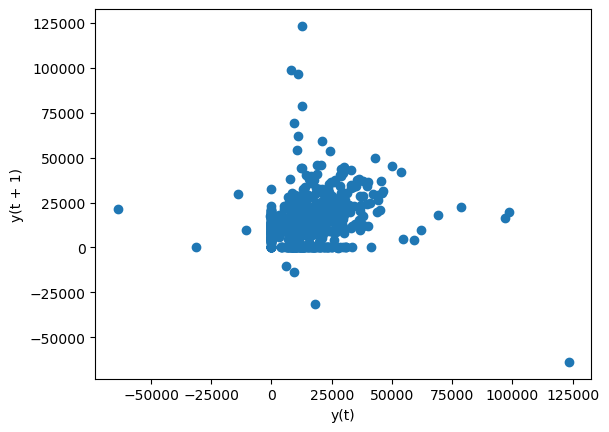

In [32]:
pd.plotting.lag_plot(day['sales'], lag=1)

<Axes: xlabel='y(t)', ylabel='y(t + 7)'>

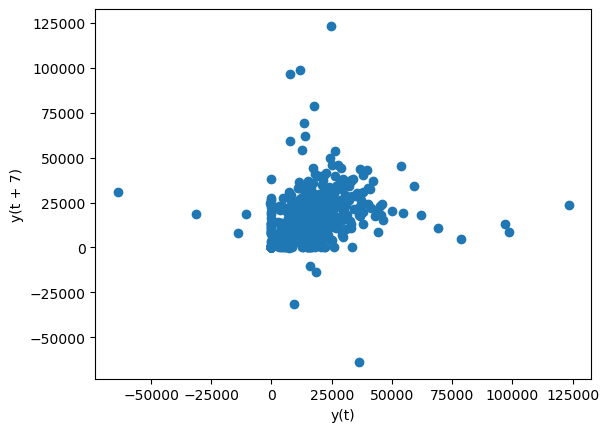

In [33]:
pd.plotting.lag_plot(day['sales'], lag=7)

<Axes: xlabel='y(t)', ylabel='y(t + 14)'>

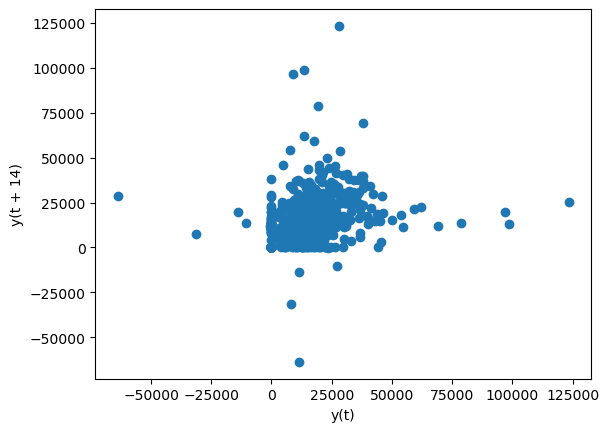

In [34]:
pd.plotting.lag_plot(day['sales'], lag=14)

<Axes: xlabel='y(t)', ylabel='y(t + 30)'>

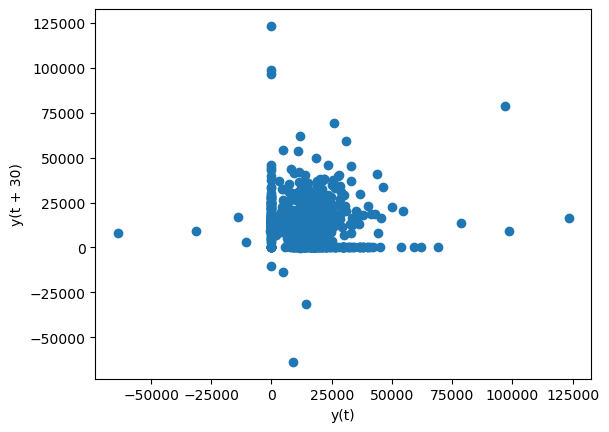

In [35]:
pd.plotting.lag_plot(day['sales'], lag=30)

<Axes: xlabel='y(t)', ylabel='y(t + 180)'>

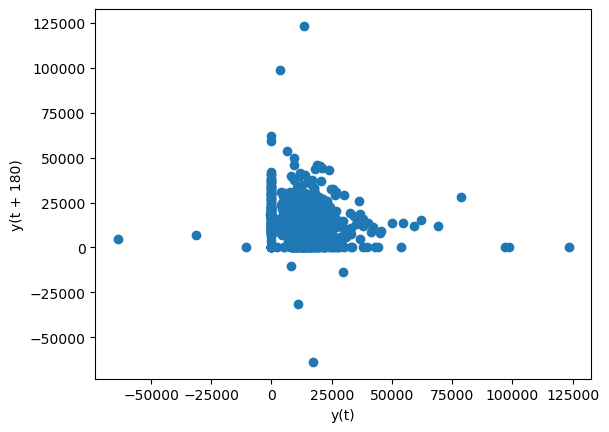

In [36]:
pd.plotting.lag_plot(day['sales'], lag=180)

<Axes: xlabel='y(t)', ylabel='y(t + 365)'>

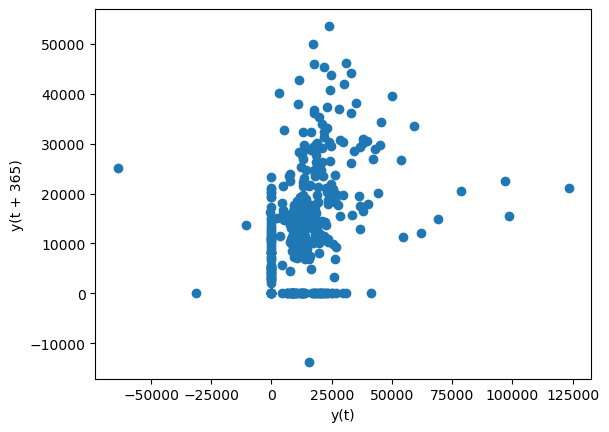

In [37]:
pd.plotting.lag_plot(day['sales'], lag=365)

### Autocorrelation and Partial Autocorrelation Plots

Autocorrelation and Partial Autocorrelation are similar in the sense that they are both plotting using lagged versions of the data, but the autocorrelation plot will use the data between lags whereas the partial autocorrelation will not use the data between lags. An example of this can be described when using a lag of 2. The autocorrelation plot will use the lag from last time period and 2 time periods ago and the partial autocorrelation plot will use the data from lag two but not from lag one. Any point lying above or below the dashed line means it is statistically significant at the 95% confidence level and may be used in a model. 

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

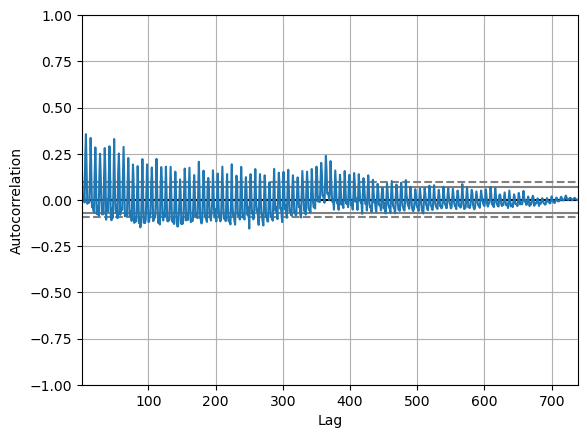

In [38]:
pd.plotting.autocorrelation_plot(day['2009':'2011']['sales'])

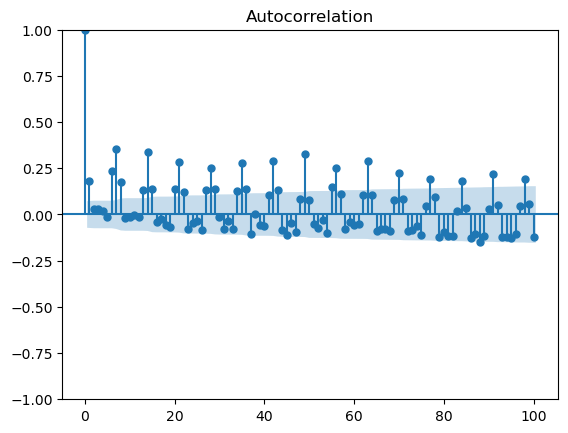

In [39]:
# trying pacf and acf plots
acf_plot = plot_acf(day.sales, lags=100)

C:\Users\ryans\anaconda_3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



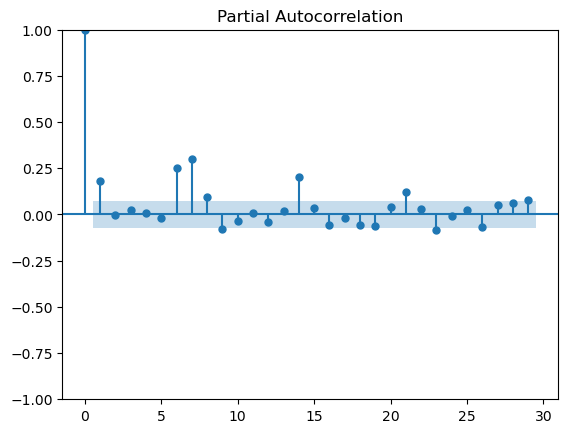

In [40]:
# pacf plot
pacf_plot = plot_pacf(day.sales)

From the PACF above we see strong correlation at lags 1, 6, 7, 14, and 21. Strong correlation at these lags may indicate seasonality in our data. We can also use seasonal_decompose from the stats models package to see if there is any seasonality. From the results it appears we are correct in saying there is weekly seasonality since the lags from roughly one week ago are correlated and will thus help us make forecasts for the next period. 

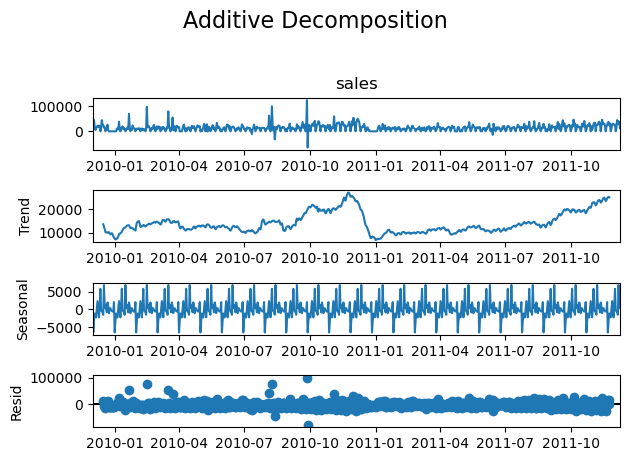

In [42]:
# decompose
additive_decomposition = seasonal_decompose(day['sales'], model='additive', period=30)
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
seasonal = additive_decomposition.seasonal
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

<Axes: xlabel='date'>

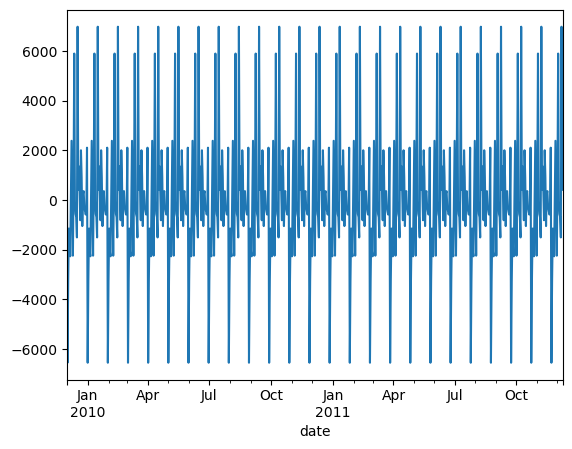

In [43]:
seasonal.plot()

In [4]:
# we will be using this for our ARIMA model in the next part of the assignment
! conda install pmdarima --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\ryans\anaconda_3

  added / updated specs:
    - pmdarima


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cython-0.29.35             |  py310hd77b12b_0         1.9 MB
    pmdarima-2.0.3             |  py310h2bbff1b_0         554 KB
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

  cython             pkgs/main/win-64::cython-0.29.35-py310hd77b12b_0 
  pmdarima           pkgs/main/win-64::pmdarima-2.0.3-py310h2bbff1b_0 




cython-0.29.35       | 1.9 MB    |            |   0% 

pmdarima-2.0.3       | 554 KB    |            |   0% 
cython-0.29.35       | 1.9 MB    |            |   1% 

pmdarima-2.0.3       | 554 KB    | 2          |   3% 
cython-0.29.35       | 1.9 MB 